In [1]:
from collections import Counter, defaultdict
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
project_path = Path("/projects/b1171/ylk4626/project/Chimera")

# TODO 

- [x] check chimeric rate for p2 and mk1c
- [ ] construct traning set by chimeric read


| Sample | No. chimeric reads  | No. total reads | ratio |
|---|---|---|---|
| P2 dirty | 12963576 | 28027667  | 0.46 |  
| P2 clean |  233740  | 10065403  | 0.023  | 
| mk1c dirty | 1666427 |7193945  | 0.23 | 
| mk1c clean | 28748 |1140363  | 0.025  | 

## MK1C dirty
The number of sequences: 7193945
The minimum length of sequences: 3
The maximum length of sequences: 42118
The mean length of sequences: 1469.25
The standard deviation of sequences: 1148.43
The first quartile of sequences: 760
The second quartile of sequences: 1143
The third quartile of sequences: 1766

## MK1C clean 
The number of sequences: 1140363
The minimum length of sequences: 4
The maximum length of sequences: 239720
The mean length of sequences: 6852.38
The standard deviation of sequences: 10041.85
The first quartile of sequences: 2021
The second quartile of sequences: 3526
The third quartile of sequences: 6793

## P2 dirty
The number of sequences: 28027667
The minimum length of sequences: 1
The maximum length of sequences: 126974
The mean length of sequences: 2488.00
The standard deviation of sequences: 2056.88
The first quartile of sequences: 1139
The second quartile of sequences: 1864
The third quartile of sequences: 3153

## P2 clean
The number of sequences: 10065403
The minimum length of sequences: 0
The maximum length of sequences: 387657
The mean length of sequences: 7024.89
The standard deviation of sequences: 8518.80
The first quartile of sequences: 2593
The second quartile of sequences: 3550
The third quartile of sequences: 7657


[2025-06-20T02:33:31Z INFO  annotate] "data/raw/PC3_bulk_WGS_P2_clean.bam" collect 233740 chimeric events
[2025-06-20T02:33:32Z INFO  annotate] write 233740 chimeric events to "data/raw/PC3_bulk_WGS_P2_clean.chimeric_events.txt"
[2025-06-20T02:33:32Z INFO  annotate] "data/raw/PC3_bulk_WGS_Pacbio_clean.bam" collect 114430 chimeric events
[2025-06-20T02:33:32Z INFO  annotate] write 114430 chimeric events to "data/raw/PC3_bulk_WGS_Pacbio_clean.chimeric_events.txt"
[2025-06-20T02:33:32Z INFO  annotate] "data/raw/PC3_bulk_WGS_Mk1c_clean.bam" collect 28748 chimeric events
[2025-06-20T02:33:32Z INFO  annotate] write 28748 chimeric events to "data/raw/PC3_bulk_WGS_Mk1c_clean.chimeric_events.txt"
[2025-06-20T02:35:03Z INFO  annotate] "data/raw/PC3_10_cells_MDA_P2_dirty.bam" collect 12963576 chimeric events
[2025-06-20T02:35:15Z INFO  annotate] write 12963576 chimeric events to "data/raw/PC3_10_cells_MDA_P2_dirty.chimeric_events.txt"


In [3]:
def read_sup(path):
    result = {}
    with open(path) as f:
        for line in f:
            content = line.strip().split()
            result[content[0]] = int(content[1])
    return result
            
            

In [4]:
sup_threshold_1000 = read_sup(project_path/"data/raw/PC3_10_cells_MDA_P2_dirty.threshold_1000.sup.txt")

In [6]:
sup_threshold_1000

{'68145a05-b7ee-4344-823a-d0d4998b6be4': 0,
 'bb21acd4-3187-47f7-8fee-8cb361ae2a1b': 0,
 '8d1a56a0-e60f-4909-8517-e293e4fcd17b': 0,
 '917b7243-8d22-410e-8b92-3a6c68ed7a33_1': 0,
 'c381fa56-7c68-4216-a411-eb405747550a': 0,
 '44ea3488-c90c-4023-8cc4-7c631c0297d9': 0,
 '5e4d3e9e-d5fd-481e-8e19-8863689e5ee5': 0,
 '6c0d9a0a-4323-4e70-8939-677b0fcc3be6': 0,
 '2334694d-2ba6-4d09-b873-e69601628c9c': 0,
 '77a0f686-44ba-43ef-b2f1-d0ff2239ee9c': 0,
 '4a62acc5-970c-4219-bd79-c99716d6c75c': 0,
 '71fc2188-984e-4f0b-94ba-0a6bb672eeca': 0,
 '3e67dc99-32bc-47d5-ba6d-b400d62fcd0f': 0,
 '80d28ed3-e6c4-47a4-bd10-949c845899c6': 0,
 '0545c227-ced9-45d6-b473-14243ac8b217': 0,
 '7c5efab4-4ba7-4217-b6ae-031ae0ffce82_2': 0,
 '918e972a-8611-499c-a123-a35f4169bfdf': 0,
 '005e8257-0e0c-410c-9d15-737c3c807864': 0,
 'f4209899-f4bf-4570-8411-2c1acc370c07': 0,
 'ccd7cfd0-3f77-428c-a56e-82a0ec8943b4': 0,
 'e7da2f28-42a0-4873-a31e-051c5b0c5abe_1': 0,
 'f0d6dbac-b396-4d40-adda-1a3a4aeab808': 0,
 'c00ac3dd-b34f-438b-bc1f-

In [7]:
from collections import Counter

In [8]:
sup_threshold_1000_counter = Counter(sup_threshold_1000.values())

In [9]:
sup_threshold_1000_counter

Counter({0: 12670396, 2: 190309, 1: 101094, 3: 1777})

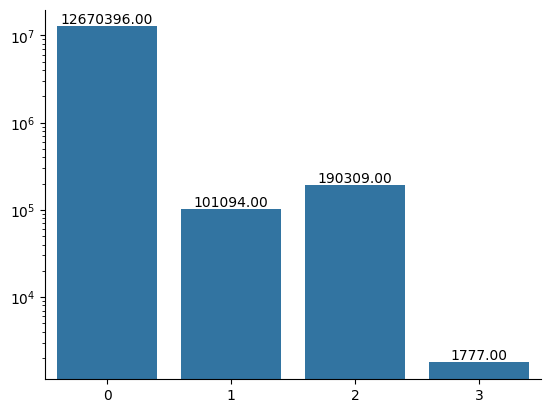

In [15]:
ax = sns.barplot(sup_threshold_1000_counter)
sns.despine()
plt.bar_label(ax.containers[0], fmt='%.2f') 
plt.yscale('log')

In [19]:
def read_chimeric_read(path):
    result = set()
    with open(path) as f:
        for line in f:
            result.add(line.strip())
    return result 

def read_prediction(path):
    result = {}
    with open(path) as f:
        for line in f:
            content = line.strip().split()
            result[content[0]] = int(content[1])
    return result

In [17]:
mk1c_chimeric_reads = read_chimeric_read(project_path/"data/raw/PC3_10_cells_MDA_Mk1c_dirty.bam.chimeric_reads.txt")

In [18]:
len(mk1c_chimeric_reads)

1666427

In [25]:
len(set(mk1c_chimeric_reads))

1666427

In [20]:
mk1c_predictions = read_prediction(project_path/"data/mk1c_predicts.txt")

In [21]:
len(mk1c_predictions)

7193945

In [28]:
mk1c_predictions

{'1b355110-6829-476d-a01b-c901ae0a1e6a_2': 1,
 '00c7693d-f93d-46aa-b705-8e291f8ff2b9': 0,
 'a69965ed-9375-4bd1-bbf4-3bc82356464f': 1,
 'a4002ecb-785c-4290-b383-d4d01b06d9a4': 0,
 '4b472d66-6e1c-4738-85d3-4a5706989316': 1,
 '93796b7d-af5c-4233-a32a-0aaec02648b5_1': 1,
 '4bfc6de3-57e4-496e-9b8c-1845fb8750a5': 0,
 'd772ac48-0ceb-43f6-ae80-04736efb643f': 0,
 'eca10819-3153-4326-a032-d306b042c838': 0,
 '0a7a1d03-b527-46c9-8e76-8b6480417605': 0,
 'b7b95cda-1b44-40f0-90fd-d30eeb898490': 0,
 'f87dfe18-b2b7-4c21-a268-18ad7edb8a35': 0,
 '21894444-9aab-4cc4-8ce2-b9f5a859517c': 1,
 '1c39ad0a-7173-4591-837f-61fa52826453': 0,
 '4df09e46-4781-4507-adba-1887b9a736fd': 0,
 'be797609-6005-42f7-b725-0ebb865d177a': 0,
 'a26dd053-0e08-4d26-aae2-2ab221770aef': 0,
 '3c1d5d3e-1d31-4b55-b6cd-d965e7f4f245': 1,
 'd6596a42-67be-431e-9d63-950bfffaef3b': 1,
 'aa153c9b-a999-4642-8e88-620e13023d3d': 1,
 '32169a54-4937-4b89-9310-023661b53ca7': 1,
 '11bee3af-6335-4c4c-9a73-e17ffe608721': 0,
 '0af36e59-0f11-49e0-9c7f-78

In [22]:
mk1c_predictions_positive = [read for read, prediction in mk1c_predictions.items() if prediction == 1]

In [23]:
len(mk1c_predictions_positive)

2530708

In [24]:
len(set(mk1c_predictions_positive))

2530708

In [27]:
len(set(mk1c_predictions_positive).intersection(set(mk1c_chimeric_reads)))

891926

In [29]:
891926 / 2530708

0.3524412931084898